# Problema:  Prever se um cliente vai cancelar sua assinatura

# Estrutura das variáveis


*   **Estado:** O estado de onde o cliente é originário
*   **Tempo de conta:** Número de dias que o cliente está usando os serviços
*   **Código de área:** A área de onde o cliente é originário
*   **Número de telefone:** O número de telefone do cliente
*   **Plano internacional:** O status do plano internacional do cliente
*   **Plano de correio de voz:** O status do plano de correio de voz do cliente
*   **Número de mensagens de correio de voz:** Número de mensagens de correio de voz enviadas pelo cliente
*   **Total de minutos diurnos:** Total de minutos de chamadas feitos por um cliente durante o dia
*   **Total de chamadas diurnas:** Número total de chamadas feitas por um cliente durante o dia
*   **Total de cobranças diurnas:** Valor total cobrado a um cliente **durante** o dia
*   **Total de minutos vespertinos:** Total de minutos de chamadas feitos por um cliente durante a tarde
*   **Total de chamadas vespertinas:** Número total de chamadas feitas por um cliente durante a tarde
*   **Total de cobranças vespertinas:** Valor total cobrado a um cliente durante a tarde
*   **Total de minutos noturnos:** Total de minutos de chamadas feitos por um cliente durante a noite
*   **Total de chamadas noturnas:** Número total de chamadas feitas por um cliente durante a noite
*   **Total de cobranças noturnas:** Valor total cobrado a um cliente durante a noite
*   **Total de minutos internacionais:** Total de minutos de chamadas internacionais feitas por um cliente
*   **Total de chamadas internacionais:** Número total de chamadas internacionais feitas por um cliente
*   **Total de cobranças internacionais:** Valor total cobrado por chamadas internacionais feitas por um cliente
*   **Chamadas ao serviço de atendimento ao cliente:** Número total de chamadas feitas ao serviço de atendimento ao cliente
*   **Cancelamento:** Cancelado ou não

https://github.com/kuldeep1909/Sony-Research-Machine-Learning-Project

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn
#!pip install jupyter
!pip install shap
!pip install torchmetrics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchmetrics
from torch.utils.data import TensorDataset, DataLoader

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from imblearn.over_sampling import ADASYN

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import set_config
set_config(display='diagram')

import warnings
warnings.filterwarnings('ignore')


In [ ]:
url = 'Sony_data.csv'
df = pd.read_csv(url)
df.head()

,Estado,Tempo_conta,Codigo_area,Numero_telefone,Plano_internacional,Plano_correio,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,...,Total_chamadas_vespertinas,Total_cobrancas_vespertinas,Total_minutos_noturnos,Total_chamadas_noturnas,Total_cobrancas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento,Cancelamento
0,KS,128,415,382-4657,nao,sim,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,nao,sim,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,nao,nao,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,sim,nao,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,sim,nao,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Divisão em Treino e Teste

**Razões para Dividir em Treino e Teste**

1. Treinar o Modelo: Durante o treinamento, o modelo de aprendizado de máquina utiliza o conjunto de dados de treino para ajustar seus parâmetros internos (pesos, coeficientes, etc.). O objetivo do treinamento é encontrar padrões nos dados e aprender a fazer previsões. Conjunto de treino: Este conjunto de dados é utilizado para treinar o modelo. Ele contém tanto as variáveis de entrada (features) quanto as saídas (rótulos/valores alvo) que o modelo deve prever.

2. Avaliar a Generalização do Modelo: Depois de treinar o modelo, é necessário verificar como ele se comporta com dados que não foram utilizados durante o treinamento. Isso é feito com o conjunto de teste. O conjunto de teste fornece uma avaliação objetiva da capacidade de generalização do modelo, ou seja, sua habilidade de fazer previsões corretas em dados novos e desconhecidos.
Sem essa etapa, você não teria como saber se o modelo está simplesmente memorizando os dados de treino (overfitting) ou se está realmente aprendendo os padrões subjacentes que podem ser aplicados a novos dados.

3. Evitar Overfitting:
Overfitting ocorre quando o modelo se ajusta tão bem aos dados de treino que perde a capacidade de generalizar para novos dados. O modelo pode aprender "ruídos" ou padrões específicos dos dados de treino que não existem no mundo real. Ao avaliar o modelo com dados de teste, que ele nunca viu antes, podemos identificar se ele está superajustando os dados de treino ou se é capaz de generalizar para novos exemplos.

4. Obter uma Estimativa de Performance Real:
Avaliar o modelo com o conjunto de teste fornece uma estimativa realista da sua performance em dados futuros. Isso é importante porque, no mundo real, o modelo será aplicado a dados que não foram vistos durante o treinamento.
Métricas como acurácia, precisão, revocação, F1-score e erro quadrático médio calculadas com o conjunto de teste nos dão uma ideia de quão bem o modelo irá performar em produção.


**Fluxo de Trabalho**

* Treinamento do Modelo: O conjunto de treino é usado para ajustar o modelo, encontrar padrões nos dados e determinar os melhores parâmetros para realizar previsões.

* Validação (opcional): Em muitos casos, além da divisão entre treino e teste, um terceiro conjunto, chamado de validação, é utilizado para afinar os hiperparâmetros do modelo (parâmetros que não são ajustados automaticamente, como a profundidade de uma árvore de decisão ou a taxa de aprendizado em redes neurais).

* Teste do Modelo: O conjunto de teste, que contém dados completamente novos, é utilizado para testar o modelo e medir sua capacidade de fazer previsões corretas em dados desconhecidos.

In [ ]:
# Divisão em treino e teste
X = df.drop(columns=['Cancelamento'])
y = df['Cancelamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Conjunto de treino: ", X_train.shape)
print("Conjunto de teste: ", X_test.shape)

Conjunto de treino:  (2666, 20)
Conjunto de teste:  (667, 20)


# Processamento dos dados

In [ ]:
X_train.head(5)

,Estado,Tempo_conta,Codigo_area,Numero_telefone,Plano_internacional,Plano_correio,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,Total_cobrancas_vespertinas,Total_minutos_noturnos,Total_chamadas_noturnas,Total_cobrancas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento
3286,OH,106,415,352-2270,nao,sim,30,220.1,105,37.42,222.2,109,18.89,158.4,96,7.13,13.1,8,3.54,0
86,IN,94,408,402-1251,nao,nao,0,157.9,105,26.84,155.0,101,13.18,189.6,84,8.53,8.0,5,2.16,4
1349,KY,71,510,403-1953,nao,sim,22,141.4,107,24.04,163.0,105,13.86,220.0,99,9.90,5.6,3,1.51,2
1649,NH,130,408,390-4003,nao,nao,0,68.4,86,11.63,193.3,110,16.43,171.5,139,7.72,10.4,4,2.81,0
3000,NJ,87,510,387-2799,nao,nao,0,223.2,109,37.94,127.5,86,10.84,289.3,83,13.02,14.5,4,3.92,3


In [ ]:
X_train.describe(include='object')

,Estado,Numero_telefone,Plano_internacional,Plano_correio
count,2666,2666,2666,2666
unique,51,2666,2,2
top,WV,352-2270,nao,nao
freq,89,1,2411,1934


In [ ]:
# Corrigir tipo
def correct_type(df_origem):
  df_origem['Codigo_area'] = df_origem['Codigo_area'].astype('object')
  return df_origem

In [ ]:
X_train = correct_type(X_train)
X_test = correct_type(X_test)

In [ ]:
X_train.describe(include='object')

,Estado,Codigo_area,Numero_telefone,Plano_internacional,Plano_correio
count,2666,2666,2666,2666,2666
unique,51,3,2666,2,2
top,WV,415,352-2270,nao,nao
freq,89,1336,1,2411,1934


In [ ]:
# Deletar colunas inúteis
def delete_column(df_origem):
  df_origem = df_origem.drop('Numero_telefone', axis=1)
  return df_origem

In [ ]:
X_train = delete_column(X_train)
X_test = delete_column(X_test)

#### Binning

Binning é o processo de dividir dados contínuos em intervalos ou "bins" (também conhecidos como "caixas" ou "faixas"). Isso é feito para transformar variáveis contínuas (como idade, salário, número de mensagens, etc.) em variáveis categóricas, facilitando a análise e a interpretação dos dados, especialmente em situações onde estamos interessados em categorias ou classes.

Vantagens?
* Simplificação: Ajuda a reduzir a complexidade dos dados contínuos transformando-os em categorias discretas.
* Melhora a interpretabilidade: Em vez de lidar com números contínuos, você pode trabalhar com categorias mais fáceis de entender, como "baixo", "médio" ou "alto".
* Melhor ajuste para alguns algoritmos: Alguns modelos de aprendizado de máquina funcionam melhor com variáveis categóricas, e o binning pode melhorar a performance nesses casos.
* Manuseio de outliers: Pode ajudar a reduzir o impacto de outliers ao agrupar dados em bins.


Text(0, 0.5, 'Frequencia')

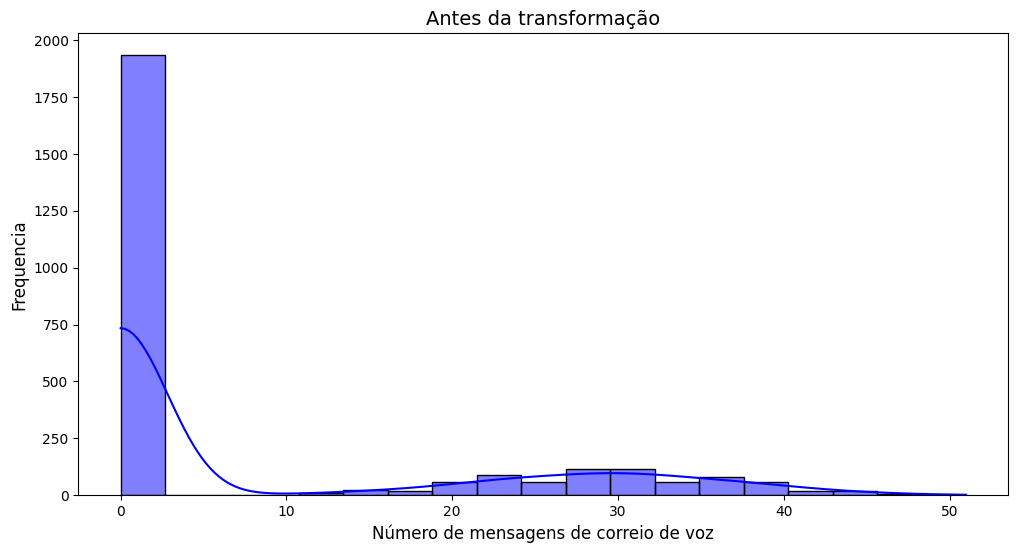

In [ ]:
#Distribuição original
plt.figure(figsize=(12, 6))

sns.histplot(X_train['Numero_mensagens_voz'], kde=True, color='blue')
plt.title('Antes da transformação', fontsize=14)
plt.xlabel('Número de mensagens de correio de voz', fontsize=12)
plt.ylabel('Frequencia', fontsize=12)

#### Comando pd.cut()

O método cut é usado para segmentar e classificar os dados da coluna ".
* bins: Define os limites dos bins.
* labels: Define os rótulos que serão atribuídos a cada bin.
* right: Indica que os limites do intervalo são exclusivos no lado direito, ou seja, por exemplo, se for FALSE um bin 0-21 inclui os valores de 0 até 20, mas não inclui 21.

In [ ]:
# Binning em dois 2 bins: 0-20, 20+
def binning(df_origem, bins,labels, columns):
  df_origem[columns] = pd.cut(df_origem[columns], bins=bins, labels=labels, right=False)
  return df_origem

In [ ]:
bins = [0, 21, np.inf]
labels = ['Baixo', 'Alto']

X_train = binning(X_train, bins,labels, 'Numero_mensagens_voz')
X_test = binning(X_test, bins,labels, 'Numero_mensagens_voz')

In [ ]:
X_train.head(5)

,Estado,Tempo_conta,Codigo_area,Plano_internacional,Plano_correio,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,Total_cobrancas_vespertinas,Total_minutos_noturnos,Total_chamadas_noturnas,Total_cobrancas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento
3286,OH,106,415,nao,sim,Alto,220.1,105,37.42,222.2,109,18.89,158.4,96,7.13,13.1,8,3.54,0
86,IN,94,408,nao,nao,Baixo,157.9,105,26.84,155.0,101,13.18,189.6,84,8.53,8.0,5,2.16,4
1349,KY,71,510,nao,sim,Alto,141.4,107,24.04,163.0,105,13.86,220.0,99,9.90,5.6,3,1.51,2
1649,NH,130,408,nao,nao,Baixo,68.4,86,11.63,193.3,110,16.43,171.5,139,7.72,10.4,4,2.81,0
3000,NJ,87,510,nao,nao,Baixo,223.2,109,37.94,127.5,86,10.84,289.3,83,13.02,14.5,4,3.92,3


Text(0, 0.5, 'Frequência')

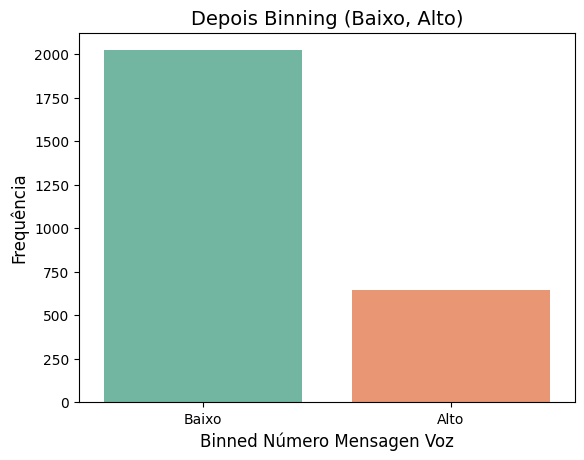

In [ ]:
# Frequência depois do bining
sns.countplot(x='Numero_mensagens_voz', data=X_train, palette='Set2')
plt.title('Depois Binning (Baixo, Alto)', fontsize=14)
plt.xlabel('Binned Número Mensagen Voz', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

In [ ]:
# Binning em 3 bins: 0-2, 3-4, 4+
bins = [0, 3, 5, np.inf]
labels = ['Baixo', 'Médio', 'Alto']

X_train = binning(X_train, bins,labels,'Chamadas_atendimento')
X_test = binning(X_test, bins,labels,'Chamadas_atendimento')

In [ ]:
X_train.head(5)

,Estado,Tempo_conta,Codigo_area,Plano_internacional,Plano_correio,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,Total_cobrancas_vespertinas,Total_minutos_noturnos,Total_chamadas_noturnas,Total_cobrancas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento
3286,OH,106,415,nao,sim,Alto,220.1,105,37.42,222.2,109,18.89,158.4,96,7.13,13.1,8,3.54,Baixo
86,IN,94,408,nao,nao,Baixo,157.9,105,26.84,155.0,101,13.18,189.6,84,8.53,8.0,5,2.16,Médio
1349,KY,71,510,nao,sim,Alto,141.4,107,24.04,163.0,105,13.86,220.0,99,9.90,5.6,3,1.51,Baixo
1649,NH,130,408,nao,nao,Baixo,68.4,86,11.63,193.3,110,16.43,171.5,139,7.72,10.4,4,2.81,Baixo
3000,NJ,87,510,nao,nao,Baixo,223.2,109,37.94,127.5,86,10.84,289.3,83,13.02,14.5,4,3.92,Médio


#### Log Transformation

Log Transformation (Transformação Logarítmica) é uma técnica usada para transformar variáveis de dados, aplicando a função logarítmica a elas. Essa transformação é muito útil em situações onde os dados são altamente assimétricos (ou seja, possuem skewness), ou quando existem outliers que podem distorcer os resultados de análises ou modelagens.

Objetivo da Log Transformation:
* Reduzir Skewness: Muitas variáveis, especialmente em domínios como finanças e economia, têm distribuições altamente assimétricas (skewed), onde a maior parte dos dados se concentra em uma extremidade e há uma cauda longa. A transformação logarítmica pode "achatar" a distribuição, tornando-a mais simétrica e mais parecida com uma distribuição normal, o que é importante para muitas análises estatísticas.
* Reduzir a influência de outliers: Em dados altamente dispersos, valores extremos (outliers) podem ter um grande impacto. A transformação logarítmica reduz o impacto desses valores extremos, fazendo com que eles se ajustem melhor ao restante dos dados.
* Normalização: Em alguns casos, aplicar a transformação logarítmica pode aproximar os dados de uma distribuição normal, o que é uma suposição comum em várias técnicas de análise de dados e aprendizado de máquina.

Text(0, 0.5, 'Frequência')

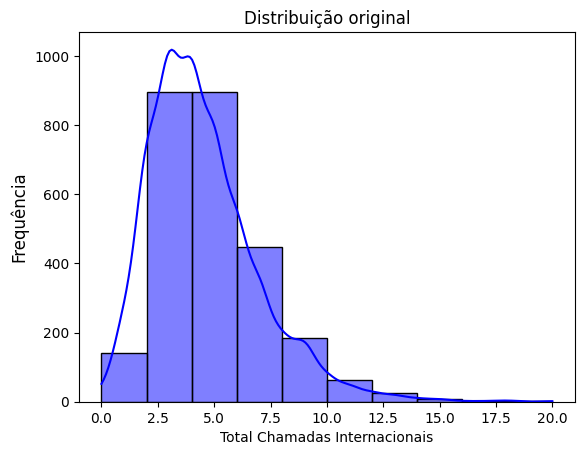

In [ ]:
sns.histplot(X_train['Total_chamadas_internacionais'], bins=10, kde=True, color='blue')
plt.title('Distribuição original')
plt.xlabel('Total Chamadas Internacionais')
plt.ylabel('Frequência', fontsize=12)

#### np.log1p()

O np.log1p() é uma função da biblioteca NumPy que calcula o logaritmo natural (base e) de um número mais 1. Em outras palavras, np.log1p(x) é equivalente a log(1 + x). Isso é feito para evitar o problema de calcular log(0), que não é definido (o logaritmo de zero não existe). Ao adicionar 1 aos valores, garantimos que a transformação logarítmica possa ser aplicada mesmo quando os dados contêm zeros

In [ ]:
# Aplicando log transformation para reduzir skewness (adicionando 1 para evitar log(0))
def log_transformation(df_origem):
  df_origem['Total_chamadas_internacionais'] = np.log1p(df_origem['Total_chamadas_internacionais'])
  return df_origem

In [ ]:
X_train = log_transformation(X_train)
X_test = log_transformation(X_test)

In [ ]:
X_train.head(5)

,Estado,Tempo_conta,Codigo_area,Plano_internacional,Plano_correio,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,Total_cobrancas_vespertinas,Total_minutos_noturnos,Total_chamadas_noturnas,Total_cobrancas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento
3286,OH,106,415,nao,sim,Alto,220.1,105,37.42,222.2,109,18.89,158.4,96,7.13,13.1,2.197225,3.54,Baixo
86,IN,94,408,nao,nao,Baixo,157.9,105,26.84,155.0,101,13.18,189.6,84,8.53,8.0,1.791759,2.16,Médio
1349,KY,71,510,nao,sim,Alto,141.4,107,24.04,163.0,105,13.86,220.0,99,9.90,5.6,1.386294,1.51,Baixo
1649,NH,130,408,nao,nao,Baixo,68.4,86,11.63,193.3,110,16.43,171.5,139,7.72,10.4,1.609438,2.81,Baixo
3000,NJ,87,510,nao,nao,Baixo,223.2,109,37.94,127.5,86,10.84,289.3,83,13.02,14.5,1.609438,3.92,Médio


Text(0, 0.5, 'Frequência')

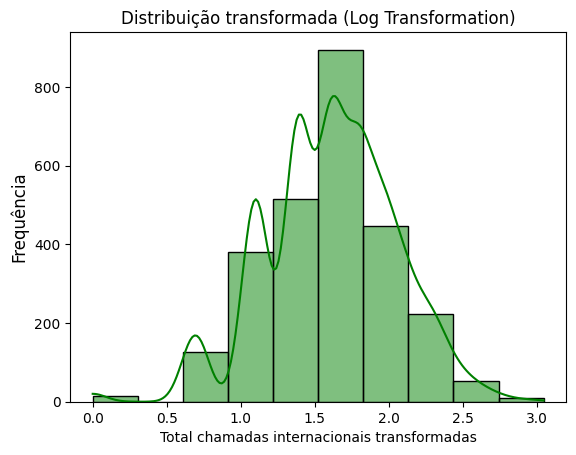

In [ ]:
sns.histplot(X_train['Total_chamadas_internacionais'], bins=10, kde=True, color='green')
plt.title('Distribuição transformada (Log Transformation)')
plt.xlabel('Total chamadas internacionais transformadas')
plt.ylabel('Frequência', fontsize=12)

#### Encoding

Encoding (ou codificação) é o processo de converter dados categóricos (geralmente texto ou rótulos) em uma representação numérica que pode ser entendida e processada por algoritmos de aprendizado de máquina. Muitos algoritmos de aprendizado de máquina e modelos estatísticos não conseguem trabalhar diretamente com variáveis categóricas, como textos ou rótulos, pois eles precisam de entradas numéricas. Exemplo de dados categóricos: Colunas com valores como 'sim', 'não', 'alto', 'médio', 'baixo', ou categorias como 'vermelho', 'azul', 'verde'.

A codificação é importante porque a maioria dos modelos de aprendizado de máquina, como regressões lineares, árvores de decisão e redes neurais, só conseguem processar entradas numéricas. Portanto, antes de aplicar qualquer modelo a um conjunto de dados que contenha variáveis categóricas, é necessário converter esses dados para uma forma que o modelo consiga interpretar. Se não fizermos a codificação, o modelo simplesmente não será capaz de processar os dados ou fornecerá resultados incorretos.

Principais Métodos de Encoding:
* Label Encoding (Codificação de Rótulos): Transforma cada categoria em um número inteiro único. Útil quando existe uma relação ordinal entre as categorias (como "baixo", "médio" e "alto"). No entanto, não deve ser usado para dados categóricos sem ordem, pois o modelo pode interpretar as relações numéricas incorretamente. Exemplo: Suponha que temos uma coluna com as categorias ["Alto", "Médio", "Baixo"]. Com o Label Encoding, essas categorias seriam convertidas em [0, 1, 2], ou seja, "Baixo" -> 0, "Médio" -> 1, "Alto" -> 2.

* One-Hot Encoding: Converte categorias em colunas binárias (0 ou 1), onde cada coluna representa uma categoria. Ideal para dados categóricos nominais (sem ordem). A codificação One-Hot evita a criação de uma relação ordinal artificial entre categorias. Exemplo: Se a coluna original contém ["Vermelho", "Verde", "Azul"], o One-Hot Encoding transformaria essa coluna em três colunas: Vermelho, Verde e Azul, onde cada linha teria 1 na coluna correspondente à sua categoria e 0 nas demais.

* Target Encoding (Codificação por Alvo): Substitui as categorias por valores calculados com base na média da variável-alvo (ou outra estatística) para cada categoria. Útil quando a cardinalidade (número de categorias) é alta e existe uma correlação entre as categorias e a variável-alvo. Exemplo: Se estamos tentando prever se um cliente vai cancelar uma assinatura (0 ou 1) e temos uma coluna "País", podemos calcular a média de cancelamento para cada país e substituir o nome do país pela média.

* Binary Encoding: Combina Label Encoding e One-Hot Encoding. Converte as categorias em números inteiros (Label Encoding) e, em seguida, codifica esses números inteiros em binário. Funciona bem quando há muitas categorias, evitando a criação de muitas colunas extras como no One-Hot Encoding.





In [ ]:
X_train.head(5)

,Estado,Tempo_conta,Codigo_area,Plano_internacional,Plano_correio,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,Total_cobrancas_vespertinas,Total_minutos_noturnos,Total_chamadas_noturnas,Total_cobrancas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento
3286,OH,106,415,nao,sim,Alto,220.1,105,37.42,222.2,109,18.89,158.4,96,7.13,13.1,2.197225,3.54,Baixo
86,IN,94,408,nao,nao,Baixo,157.9,105,26.84,155.0,101,13.18,189.6,84,8.53,8.0,1.791759,2.16,Médio
1349,KY,71,510,nao,sim,Alto,141.4,107,24.04,163.0,105,13.86,220.0,99,9.90,5.6,1.386294,1.51,Baixo
1649,NH,130,408,nao,nao,Baixo,68.4,86,11.63,193.3,110,16.43,171.5,139,7.72,10.4,1.609438,2.81,Baixo
3000,NJ,87,510,nao,nao,Baixo,223.2,109,37.94,127.5,86,10.84,289.3,83,13.02,14.5,1.609438,3.92,Médio


In [ ]:
X_train.select_dtypes(include=['object','category']).columns

Index(['Estado', 'Codigo_area', 'Plano_internacional', 'Plano_correio',
       'Numero_mensagens_voz', 'Chamadas_atendimento'],
      dtype='object')

In [ ]:
# Aplicando One-Hot Encoding
def one_hot_encoder(df_origem):
  df_origem = pd.get_dummies(df_origem, columns=['Codigo_area'])
  return df_origem

In [ ]:
X_train_copy = one_hot_encoder(X_train)
X_test_copy = one_hot_encoder(X_test)
X_train_copy.head(5)

,Estado,Tempo_conta,Plano_internacional,Plano_correio,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,...,Total_minutos_noturnos,Total_chamadas_noturnas,Total_cobrancas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento,Codigo_area_408,Codigo_area_415,Codigo_area_510
3286,OH,106,nao,sim,Alto,220.1,105,37.42,222.2,109,...,158.4,96,7.13,13.1,2.197225,3.54,Baixo,False,True,False
86,IN,94,nao,nao,Baixo,157.9,105,26.84,155.0,101,...,189.6,84,8.53,8.0,1.791759,2.16,Médio,True,False,False
1349,KY,71,nao,sim,Alto,141.4,107,24.04,163.0,105,...,220.0,99,9.90,5.6,1.386294,1.51,Baixo,False,False,True
1649,NH,130,nao,nao,Baixo,68.4,86,11.63,193.3,110,...,171.5,139,7.72,10.4,1.609438,2.81,Baixo,True,False,False
3000,NJ,87,nao,nao,Baixo,223.2,109,37.94,127.5,86,...,289.3,83,13.02,14.5,1.609438,3.92,Médio,False,False,True


In [ ]:
# Aplicando mapping: encoding da variável booleana Cancelamento
def mapping_target(df_origem):
    if isinstance(df_origem, pd.DataFrame):
        boolean_cols = df_origem.select_dtypes(include=['bool']).columns
        df_origem[boolean_cols] = df_origem[boolean_cols].applymap(lambda x: 1 if x else 0)
        return df_origem
    elif isinstance(df_origem, pd.Series) and df_origem.dtype == 'bool':
        return df_origem.map({True: 1, False: 0})

In [ ]:
X_train_copy = mapping_target(X_train_copy)
X_test_copy = mapping_target(X_test_copy)

y_train = mapping_target(y_train)
y_test = mapping_target(y_test)

X_train_copy.head(5)

,Estado,Tempo_conta,Plano_internacional,Plano_correio,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,...,Total_minutos_noturnos,Total_chamadas_noturnas,Total_cobrancas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento,Codigo_area_408,Codigo_area_415,Codigo_area_510
3286,OH,106,nao,sim,Alto,220.1,105,37.42,222.2,109,...,158.4,96,7.13,13.1,2.197225,3.54,Baixo,0,1,0
86,IN,94,nao,nao,Baixo,157.9,105,26.84,155.0,101,...,189.6,84,8.53,8.0,1.791759,2.16,Médio,1,0,0
1349,KY,71,nao,sim,Alto,141.4,107,24.04,163.0,105,...,220.0,99,9.90,5.6,1.386294,1.51,Baixo,0,0,1
1649,NH,130,nao,nao,Baixo,68.4,86,11.63,193.3,110,...,171.5,139,7.72,10.4,1.609438,2.81,Baixo,1,0,0
3000,NJ,87,nao,nao,Baixo,223.2,109,37.94,127.5,86,...,289.3,83,13.02,14.5,1.609438,3.92,Médio,0,0,1


In [ ]:
y_train

,Cancelamento
3286,0
86,1
1349,0
1649,0
3000,0
...,...
2670,0
2165,0
2988,0
179,0


In [ ]:
X_train['Plano_internacional'].unique()

array(['nao', 'sim'], dtype=object)

In [ ]:
X_train['Plano_correio'].unique()

array(['sim', 'nao'], dtype=object)

In [ ]:
X_train['Numero_mensagens_voz'].unique()

['Alto', 'Baixo']
Categories (2, object): ['Baixo' < 'Alto']

In [ ]:
X_train['Chamadas_atendimento'].unique()

['Baixo', 'Médio', 'Alto']
Categories (3, object): ['Baixo' < 'Médio' < 'Alto']

In [ ]:
# Aplicando Label Encoder
def label_encoder(df_origem):
  le = LabelEncoder()
  df_origem['Plano_internacional'] = le.fit_transform(df_origem['Plano_internacional'])
  df_origem['Plano_correio'] = le.fit_transform(df_origem['Plano_correio'])
  df_origem['Chamadas_atendimento'] = le.fit_transform(df_origem['Chamadas_atendimento'])
  df_origem['Numero_mensagens_voz'] = le.fit_transform(df_origem['Numero_mensagens_voz'])
  return df_origem

In [ ]:
X_train = label_encoder(X_train)
X_test = label_encoder(X_test)

In [ ]:
X_train.head()

,Estado,Tempo_conta,Codigo_area,Plano_internacional,Plano_correio,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,Total_cobrancas_vespertinas,Total_minutos_noturnos,Total_chamadas_noturnas,Total_cobrancas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento
3286,OH,106,415,0,1,0,220.1,105,37.42,222.2,109,18.89,158.4,96,7.13,13.1,2.197225,3.54,1
86,IN,94,408,0,0,1,157.9,105,26.84,155.0,101,13.18,189.6,84,8.53,8.0,1.791759,2.16,2
1349,KY,71,510,0,1,0,141.4,107,24.04,163.0,105,13.86,220.0,99,9.90,5.6,1.386294,1.51,1
1649,NH,130,408,0,0,1,68.4,86,11.63,193.3,110,16.43,171.5,139,7.72,10.4,1.609438,2.81,1
3000,NJ,87,510,0,0,1,223.2,109,37.94,127.5,86,10.84,289.3,83,13.02,14.5,1.609438,3.92,2


In [ ]:
X_train['Codigo_area'] = X_train['Codigo_area'].astype(int)
X_test['Codigo_area'] = X_test['Codigo_area'].astype(int)
X_train['Codigo_area'].unique()

array([415, 408, 510])

In [ ]:
# Aplicando Target Encoding
def target_encoding(X, y, column1, column2):
    X_temp = X.copy()
    X_temp['Cancelamento'] = y

    mean_cancelamento = X_temp.groupby(column1)['Cancelamento'].mean()
    X[column2] = X[column1].map(mean_cancelamento)
    X.drop(columns=[column1], inplace=True)
    return X

In [ ]:
X_train = target_encoding(X_train, y_train,'Estado','Media_cancelamento_por_estado')
X_train = target_encoding(X_train, y_train,'Codigo_area','Media_cancelamento_por_codigo_area')

X_test = target_encoding(X_test, y_test, 'Estado','Media_cancelamento_por_estado')
X_test = target_encoding(X_test, y_test, 'Codigo_area','Media_cancelamento_por_codigo_area')

X_train.head()

,Tempo_conta,Plano_internacional,Plano_correio,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,Total_cobrancas_vespertinas,Total_minutos_noturnos,Total_chamadas_noturnas,Total_cobrancas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento,Media_cancelamento_por_estado,Media_cancelamento_por_codigo_area
3286,106,0,1,0,220.1,105,37.42,222.2,109,18.89,158.4,96,7.13,13.1,2.197225,3.54,1,0.152542,0.148204
86,94,0,0,1,157.9,105,26.84,155.0,101,13.18,189.6,84,8.53,8.0,1.791759,2.16,2,0.160714,0.136095
1349,71,0,1,0,141.4,107,24.04,163.0,105,13.86,220.0,99,9.90,5.6,1.386294,1.51,1,0.122449,0.146789
1649,130,0,0,1,68.4,86,11.63,193.3,110,16.43,171.5,139,7.72,10.4,1.609438,2.81,1,0.127660,0.136095
3000,87,0,0,1,223.2,109,37.94,127.5,86,10.84,289.3,83,13.02,14.5,1.609438,3.92,2,0.264151,0.146789


#### Feature engineering

A feature engineering (engenharia de características) envolve, por exemplo, a criação de novas variáveis ou atributos derivados dos dados originais. O objetivo é fornecer informações adicionais que possam ajudar o modelo a capturar padrões e fazer previsões mais precisas.

Criar novas colunas pode aumentar a expressividade dos dados:
* Novas colunas podem trazer informações derivadas que não estão explícitas nas colunas originais.
* Melhorar o desempenho do modelo: A criação de novas colunas pode ajudar o modelo a encontrar padrões ou relacionamentos entre variáveis que não seriam evidentes apenas com os dados brutos. Essas variáveis derivadas podem capturar melhor a dinâmica do problema, resultando em um modelo mais preciso.
* Em muitos casos, as variáveis originais podem não ser suficientes para prever adequadamente a variável-alvo. Criar novas features pode complementar os dados e enriquecer a informação disponível para o modelo.
* Capturar relações não lineares: Em vez de trabalhar diretamente com valores absolutos, as relações entre variáveis podem ser mais úteis, mais informativas e permitir que o modelo capture melhor os padrões de consumo do cliente.
* Reduzir a dimensionalidade: Em alguns casos, criar novas colunas pode permitir que você reduza a complexidade dos dados. Ao criar colunas que combinam informações, você pode eliminar a necessidade de várias colunas originais, reduzindo assim a dimensionalidade e tornando o treinamento do modelo mais eficiente.
* Normalizar informações: Algumas colunas, podem variar significativamente, mas a relação entre variáveis pode ser mais consistente e relevante para o modelo. Isso ajuda a capturar o comportamento de forma normalizada.
* Identificar características importantes: Através da criação de novas colunas, pode-se gerar variáveis que sejam mais diretamente relacionadas à variável-alvo. Por exemplo, se estamos tentando prever se um cliente vai cancelar sua assinatura, a eficiência do uso do plano (como custo por minuto) pode ser um preditor mais eficaz do que as cobranças totais ou os minutos usados isoladamente.


In [ ]:
# Criando novas colunas
def feature_engineering(df_origem):
  df_origem['Total_chamadas_diurnas_por_minuto'] = df_origem['Total_cobrancas_diurnas'] / df_origem['Total_minutos_diurnos']
  df_origem['Total_chamadas_vespertinas_por_minuto'] = df_origem['Total_cobrancas_vespertinas'] / df_origem['Total_minutos_vespertinos']
  df_origem['Total_chamadas_noturnas_por_minuto'] = df_origem['Total_cobrancas_noturnas'] / df_origem['Total_minutos_noturnos']
  df_origem['Total_chamadas_internacionais_por_minuto'] = df_origem['Total_cobrancas_internacionais'] / df_origem['Total_minutos_internacionais']
  return df_origem

In [ ]:
X_train = feature_engineering(X_train)
X_test = feature_engineering(X_test)

X_train.head()

,Tempo_conta,Plano_internacional,Plano_correio,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,Total_cobrancas_vespertinas,...,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento,Media_cancelamento_por_estado,Media_cancelamento_por_codigo_area,Total_chamadas_diurnas_por_minuto,Total_chamadas_vespertinas_por_minuto,Total_chamadas_noturnas_por_minuto,Total_chamadas_internacionais_por_minuto
3286,106,0,1,0,220.1,105,37.42,222.2,109,18.89,...,13.1,2.197225,3.54,1,0.152542,0.148204,0.170014,0.085014,0.045013,0.270229
86,94,0,0,1,157.9,105,26.84,155.0,101,13.18,...,8.0,1.791759,2.16,2,0.160714,0.136095,0.169981,0.085032,0.044989,0.270000
1349,71,0,1,0,141.4,107,24.04,163.0,105,13.86,...,5.6,1.386294,1.51,1,0.122449,0.146789,0.170014,0.085031,0.045000,0.269643
1649,130,0,0,1,68.4,86,11.63,193.3,110,16.43,...,10.4,1.609438,2.81,1,0.127660,0.136095,0.170029,0.084997,0.045015,0.270192
3000,87,0,0,1,223.2,109,37.94,127.5,86,10.84,...,14.5,1.609438,3.92,2,0.264151,0.146789,0.169982,0.085020,0.045005,0.270345


#### Feature selection

Feature Selection (ou Seleção de Variáveis ou Seleção de Atributos) é o processo de identificar e selecionar um subconjunto das variáveis ou features mais relevantes em um conjunto de dados que são mais importantes para o desempenho de um modelo de aprendizado de máquina. O objetivo da seleção de variáveis é melhorar a performance do modelo, reduzindo a complexidade, eliminando ruídos, e aumentando a interpretabilidade.


* Redução de Overfitting: Ao reduzir o número de variáveis irrelevantes ou redundantes, você diminui o risco de overfitting (quando o modelo se ajusta demais aos dados de treino e perde a capacidade de generalizar para dados novos).
* Aumento da Performance do Modelo: Eliminar variáveis desnecessárias pode melhorar a performance do modelo, tanto em termos de precisão quanto de velocidade. Modelos mais simples tendem a ser mais rápidos para treinar e predizer, além de serem menos propensos a erro.
* Redução de Tempo de Treinamento: Menos variáveis significa menos dados para processar, o que reduz o tempo de treino do modelo e a quantidade de recursos computacionais necessários.
* Melhoria da Interpretabilidade: Modelos com menos variáveis são mais fáceis de entender e interpretar.
* Remoção de Ruído: Variáveis irrelevantes ou redundantes podem adicionar ruído aos dados, dificultando a identificação de padrões e impactando negativamente o desempenho do modelo.


In [ ]:
X_train.head(5)

,Tempo_conta,Plano_internacional,Plano_correio,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,Total_cobrancas_vespertinas,...,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento,Media_cancelamento_por_estado,Media_cancelamento_por_codigo_area,Total_chamadas_diurnas_por_minuto,Total_chamadas_vespertinas_por_minuto,Total_chamadas_noturnas_por_minuto,Total_chamadas_internacionais_por_minuto
3286,106,0,1,0,220.1,105,37.42,222.2,109,18.89,...,13.1,2.197225,3.54,1,0.152542,0.148204,0.170014,0.085014,0.045013,0.270229
86,94,0,0,1,157.9,105,26.84,155.0,101,13.18,...,8.0,1.791759,2.16,2,0.160714,0.136095,0.169981,0.085032,0.044989,0.270000
1349,71,0,1,0,141.4,107,24.04,163.0,105,13.86,...,5.6,1.386294,1.51,1,0.122449,0.146789,0.170014,0.085031,0.045000,0.269643
1649,130,0,0,1,68.4,86,11.63,193.3,110,16.43,...,10.4,1.609438,2.81,1,0.127660,0.136095,0.170029,0.084997,0.045015,0.270192
3000,87,0,0,1,223.2,109,37.94,127.5,86,10.84,...,14.5,1.609438,3.92,2,0.264151,0.146789,0.169982,0.085020,0.045005,0.270345


Text(0.5, 1.0, 'Matriz de Correlação de Pearson')

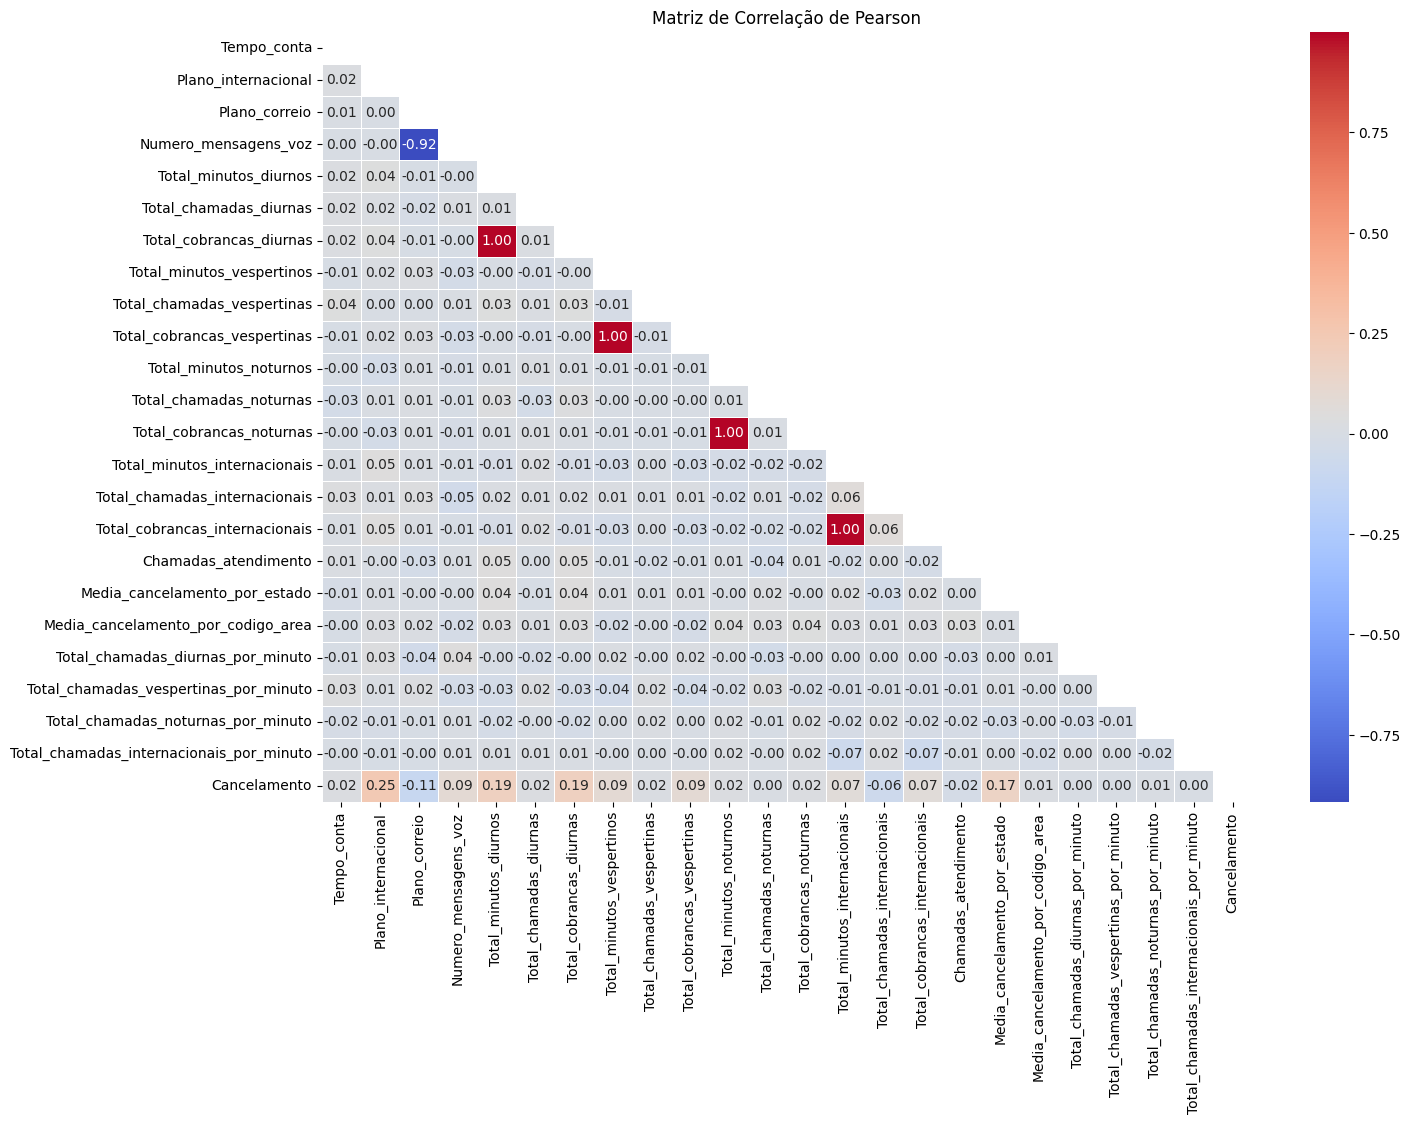

In [ ]:
pearson_correlation_matrix = pd.concat([X_train, y_train], axis=1).corr(method='pearson')
mask = np.triu(np.ones_like(pearson_correlation_matrix, dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(pearson_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"fontsize": 10}, mask=mask)
plt.title('Matriz de Correlação de Pearson')

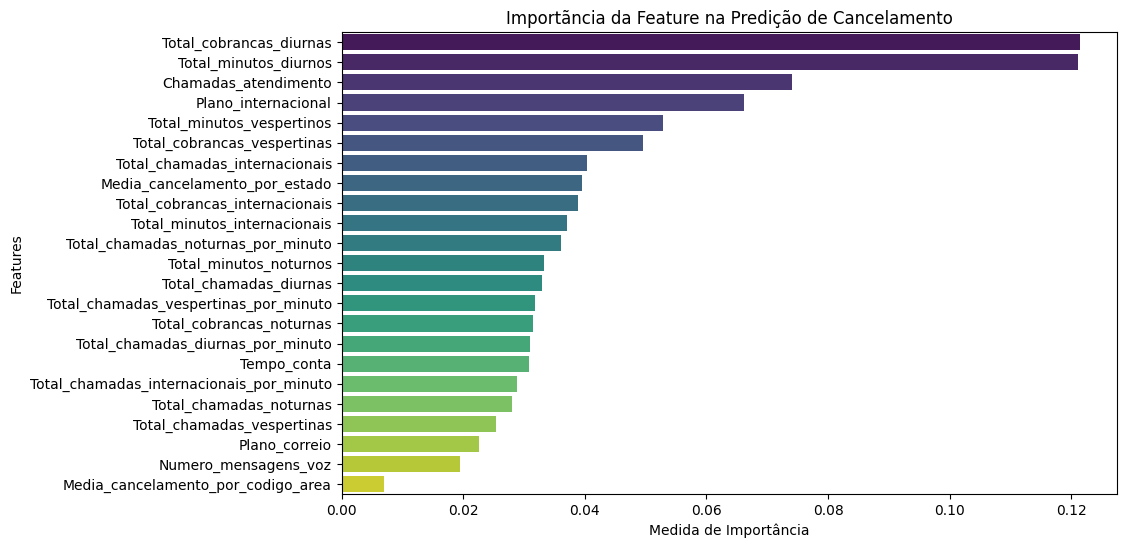

In [ ]:
# Recuperar as features mais importantes
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train, y_train)

importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns,'Importancia': importance}).sort_values(by='Importancia', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Importãncia da Feature na Predição de Cancelamento')
plt.xlabel('Medida de Importância')
plt.ylabel('Features')
plt.show()

In [ ]:
# Calcula a variância de cada coluna (ou variável) em X_train.
# A variância mede a dispersão dos dados em torno da média.
# Quanto maior a variância, mais dispersos são os valores em uma variável.

variance = X_train.var()
variance.sort_values(ascending=False)

,0
Total_minutos_diurnos,2.953812e+03
Total_minutos_vespertinos,2.549148e+03
Total_minutos_noturnos,2.495654e+03
Tempo_conta,1.589500e+03
Total_chamadas_diurnas,4.005118e+02
Total_chamadas_vespertinas,4.000536e+02
Total_chamadas_noturnas,3.835425e+02
Total_cobrancas_diurnas,8.536550e+01
Total_cobrancas_vespertinas,1.841724e+01
Total_minutos_internacionais,7.861339e+00


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(k=10)

fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
print(featureScores.nlargest(10,'Score'))

In [ ]:
# Retirando algumas colunas
columns_to_drop = ['Total_cobrancas_diurnas', 'Total_cobrancas_noturnas', 'Total_cobrancas_vespertinas',
                   'Total_cobrancas_internacionais', 'Numero_mensagens_voz', 'Total_chamadas_diurnas_por_minuto',
                   'Total_chamadas_vespertinas_por_minuto', 'Total_chamadas_internacionais_por_minuto']

X_train.drop(columns=columns_to_drop, inplace=True)
X_test.drop(columns=columns_to_drop, inplace=True)
X_train.head()

,Tempo_conta,Plano_internacional,Plano_correio,Total_minutos_diurnos,Total_chamadas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,Total_minutos_noturnos,Total_chamadas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Chamadas_atendimento,Media_cancelamento_por_estado,Media_cancelamento_por_codigo_area,Total_chamadas_noturnas_por_minuto
3286,106,0,1,220.1,105,222.2,109,158.4,96,13.1,2.197225,1,0.152542,0.148204,0.045013
86,94,0,0,157.9,105,155.0,101,189.6,84,8.0,1.791759,2,0.160714,0.136095,0.044989
1349,71,0,1,141.4,107,163.0,105,220.0,99,5.6,1.386294,1,0.122449,0.146789,0.045000
1649,130,0,0,68.4,86,193.3,110,171.5,139,10.4,1.609438,1,0.127660,0.136095,0.045015
3000,87,0,0,223.2,109,127.5,86,289.3,83,14.5,1.609438,2,0.264151,0.146789,0.045005


#### Balanceando a classe

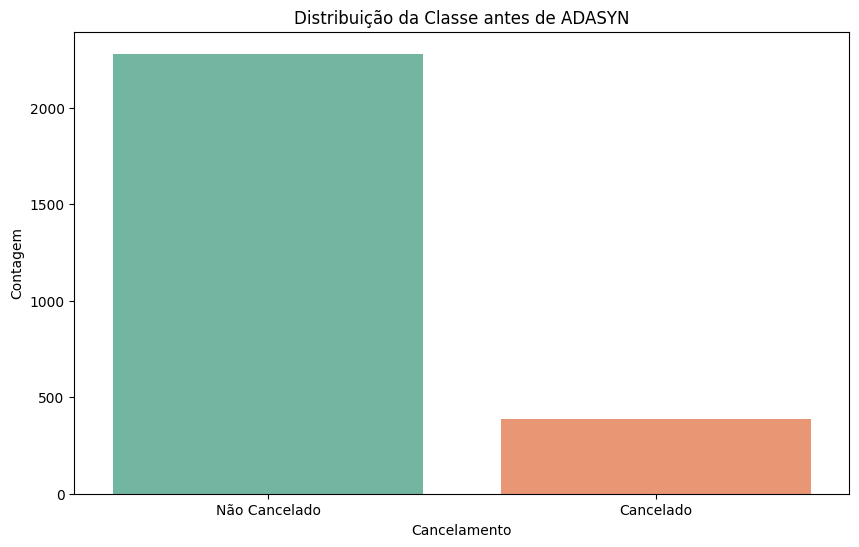

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cancelamento', data=pd.concat([X_train, y_train], axis=1), palette='Set2')
plt.title('Distribuição da Classe antes de ADASYN')
plt.xlabel('Cancelamento')
plt.ylabel('Contagem')
plt.xticks([0, 1], labels=['Não Cancelado', 'Cancelado'])
plt.show()

In [ ]:
# Aplicando o balanceamento de classes
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

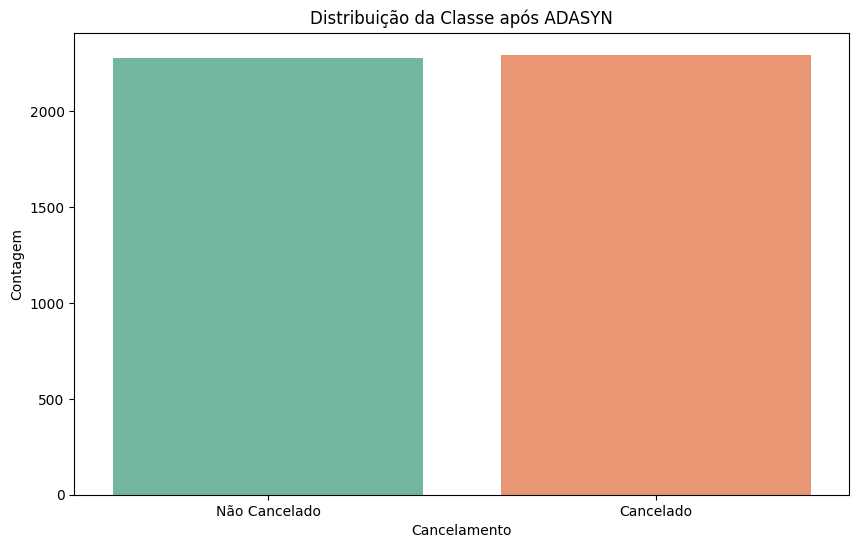

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cancelamento', data=pd.concat([X_resampled, y_resampled], axis=1), palette='Set2')
plt.title('Distribuição da Classe após ADASYN')
plt.xlabel('Cancelamento')
plt.ylabel('Contagem')
plt.xticks([0, 1], labels=['Não Cancelado', 'Cancelado'])
plt.show()

In [ ]:
before_count = pd.Series(y_train).value_counts()
after_count = pd.Series(y_resampled).value_counts()

comparison_df = pd.DataFrame({
    'Antes': before_count,
   'Depois': after_count
})

comparison_df

,Antes,Depois
Cancelamento,,
0,2280,2280
1,386,2296


In [ ]:
#X_train = X_resampled
#y_train = y_resampled

#### Normalização

Normalização é uma técnica de pré-processamento de dados que ajusta a escala dos valores de uma variável para que todos os valores estejam dentro de um intervalo específico, geralmente entre 0 e 1. O objetivo da normalização é garantir que diferentes variáveis tenham a mesma escala, o que pode ser definitivo para o desempenho de algoritmos de aprendizado de máquina.

A normalização é especialmente útil quando as variáveis do conjunto de dados têm diferentes unidades ou escalas (por exemplo, uma variável representando salários em milhares e outra representando idades). Sem normalização, os algoritmos de aprendizado de máquina podem atribuir mais importância a variáveis com maiores valores numéricos, mesmo que essas variáveis não sejam necessariamente mais importantes.

* Normalização: Escala os dados para que fiquem em um intervalo específico, geralmente entre 0 e 1. Normalização é útil quando você quer manter os valores dentro de um intervalo limitado, como entre 0 e 1.

Fórmula comum:
$$
X_{\text{norm}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$


* Padronização (Z-score): Transforma os dados para que tenham média 0 e desvio padrão 1. Ela remove a média e escala de acordo com a variabilidade dos dados. Padronização é útil quando você quer manter a distribuição original dos dados, mas precisa alinhar a média e o desvio padrão.

Fórmula comum:

$$
X_{\text{padronizado}} = \frac{X - \mu}{\sigma}
$$



As funções RobustScaler, StandardScaler, FunctionTransformer e MinMaxScaler da biblioteca Scikit-learn são usadas para transformar os dados de diferentes maneiras, dependendo do tipo de pré-processamento que você precisa realizar.

1. RobustScaler: Transforma os dados removendo a mediana e escalando os valores com base no intervalo interquartil (IQR). Ou seja, é robusto em relação a outliers, pois usa a mediana e os percentis 25 e 75 para o escalonamento.

$$
X_{\text{robusto}} = \frac{X - Q2}{Q3 - Q1}
$$


2. StandardScaler: Transforma os dados para que tenham média 0 e desvio padrão 1. Remove a média e divide pelos desvios padrão de cada feature (variável).

3. MinMaxScaler: Escala os dados para um intervalo específico, normalmente entre 0 e 1, mas você pode definir outros intervalos, como [-1, 1].

4. FunctionTransformer: Permite aplicar funções arbitrárias aos dados para transformá-los. Ele permite que você defina uma transformação personalizada sem precisar criar um objeto separado para isso. Isso pode ser útil quando você deseja aplicar transformações específicas, como transformar logaritmos ou outras operações.

In [ ]:
# Aplicando a normalização dos dados
def scaling(df_origem):
  scaler = RobustScaler()
  columns_to_scale = ['Tempo_conta', 'Total_minutos_diurnos','Total_chamadas_diurnas','Total_minutos_vespertinos','Total_chamadas_vespertinas','Total_minutos_noturnos','Total_chamadas_noturnas','Total_minutos_internacionais']
  df_origem[columns_to_scale] = scaler.fit_transform(df_origem[columns_to_scale])
  return df_origem

In [ ]:
X_train = scaling(X_train)
X_test = scaling(X_test)

In [ ]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, 3286 to 2762
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Tempo_conta                         2666 non-null   float64
 1   Plano_internacional                 2666 non-null   int64  
 2   Plano_correio                       2666 non-null   int64  
 3   Total_minutos_diurnos               2666 non-null   float64
 4   Total_chamadas_diurnas              2666 non-null   float64
 5   Total_minutos_vespertinos           2666 non-null   float64
 6   Total_chamadas_vespertinas          2666 non-null   float64
 7   Total_minutos_noturnos              2666 non-null   float64
 8   Total_chamadas_noturnas             2666 non-null   float64
 9   Total_minutos_internacionais        2666 non-null   float64
 10  Total_chamadas_internacionais       2666 non-null   float64
 11  Chamadas_atendimento                2666 non-

In [ ]:
X_train.head(5)

,Tempo_conta,Plano_internacional,Plano_correio,Total_minutos_diurnos,Total_chamadas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,Total_minutos_noturnos,Total_chamadas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Chamadas_atendimento,Media_cancelamento_por_estado,Media_cancelamento_por_codigo_area,Total_chamadas_noturnas_por_minuto
3286,0.094340,0,1,0.560632,0.148148,0.310586,0.333333,-0.626106,-0.148148,0.777778,2.197225,1,0.152542,0.148204,0.045013
86,-0.132075,0,0,-0.294057,0.148148,-0.680930,0.037037,-0.165929,-0.592593,-0.638889,1.791759,2,0.160714,0.136095,0.044989
1349,-0.566038,0,1,-0.520783,0.222222,-0.562892,0.185185,0.282448,-0.037037,-1.305556,1.386294,1,0.122449,0.146789,0.045000
1649,0.547170,0,0,-1.523875,-0.555556,-0.115824,0.370370,-0.432891,1.444444,0.027778,1.609438,1,0.127660,0.136095,0.045015
3000,-0.264151,0,0,0.603229,0.296296,-1.086684,-0.518519,1.304572,-0.629630,1.166667,1.609438,2,0.264151,0.146789,0.045005
